In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (9.0, 9.0)

# The perceptron

In this notebook we will create a Python class that implements the perceptron algorithm.

First, let's write a function that generates linearly separable data in two dimensions:

In [2]:
def generate_separable_data(N) :
    w = np.random.uniform(-1, 1, 2)
    print(w)
    X = np.random.uniform(-1, 1, [N, 2])
    print (X.shape)
    y = np.sign(np.inner(w, X))
    return X,y,w

In [3]:
generate_separable_data(10)

[-0.61684013  0.05713919]
(10, 2)


(array([[-0.92744825, -0.81236358],
        [-0.70004309,  0.3222561 ],
        [ 0.06534076,  0.08593533],
        [ 0.04679987, -0.7217905 ],
        [ 0.86729371,  0.01463821],
        [-0.82809065,  0.40109597],
        [-0.8708476 ,  0.87847806],
        [-0.36828967, -0.67558481],
        [-0.48711717, -0.69808223],
        [-0.15672283,  0.86816536]]),
 array([ 1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.]),
 array([-0.61684013,  0.05713919]))

The following is a function to display the data and the weight vector:

In [4]:
def plot_data(X, y, w) :
    fig = plt.figure(figsize=(4,4))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    a = -w[0]/w[1]
    pts = np.linspace(-1,1)
    plt.plot(pts, a*pts, 'k-')
    cols = {1: 'r', -1: 'b'}
    for i in range(len(X)): 
        plt.plot(X[i][0], X[i][1], cols[y[i]]+'o')
    plt.show() 

[-0.32139547 -0.81735261]
(50, 2)


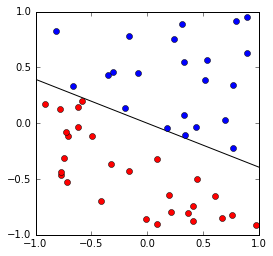

In [5]:
X,y,w = generate_separable_data(50)
plot_data(X, y, w)

And here's the Python class with the implementation of the perceptron:

In [6]:
class Perceptron :
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
 
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        self.w = np.zeros(len(X[0]))
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    plot_data(X, y, self.w)
            iterations += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iterations)
        print ('weight vector: ' + str(self.w))
 
    def decision_function(self, x) :
        return np.inner(self.w, x)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.inner(self.w, X)
        return np.sign(scores)
 


[ 0.71577113 -0.47950058]
(40, 2)


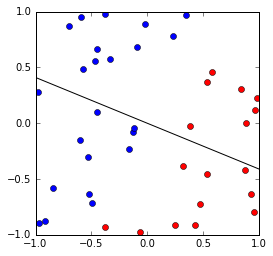

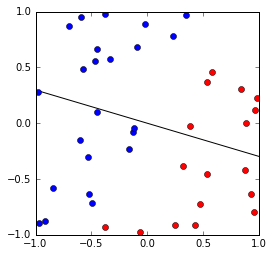

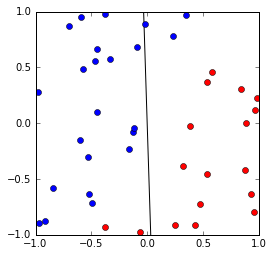

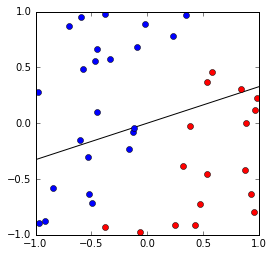

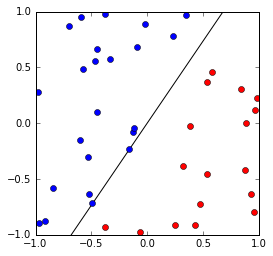

converged in 2 iterations 
weight vector: [ 0.16961734 -0.11537053]


In [7]:
X,y,w = generate_separable_data(40)
p = Perceptron()
p.fit(X,y)

Let's compare the two weight vectors:

In [13]:
p.w, w

(array([ 0.16961734, -0.11537053]), array([ 0.71577113, -0.47950058]))

Let's normalize the two vectors into unit vectors:

In [12]:
p.w/np.sqrt(np.inner(p.w, p.w))
w/np.sqrt(np.inner(w, w))


array([ 0.82685682, -0.56241248])

array([ 0.83080544, -0.55656295])

Now we can see that they are pointing more or less in the same direction!